In [3]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from config import weather_api_key

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

610

In [8]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=242848854833581b56787f1ca58dd1ad


In [9]:
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | new norfolk
Processing Record 3 of Set 1 | sao filipe
Processing Record 4 of Set 1 | hobart
Processing Record 5 of Set 1 | klaksvik
Processing Record 6 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 7 of Set 1 | avarua
Processing Record 8 of Set 1 | bluff
Processing Record 9 of Set 1 | ponta do sol
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | castro
Processing Record 12 of Set 1 | airai
Processing Record 13 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 14 of Set 1 | butaritari
Processing Record 15 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 16 of Set 1 | busselton
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | grindavik
Processing Record 19 of Set 1 | hermanus
Processing Record 20 of Set 1 | tuktoyaktuk
Processing Record 21 of Set 1 | a

Processing Record 37 of Set 4 | bima
Processing Record 38 of Set 4 | baiyin
Processing Record 39 of Set 4 | arona
Processing Record 40 of Set 4 | davila
Processing Record 41 of Set 4 | uva
Processing Record 42 of Set 4 | deputatskiy
Processing Record 43 of Set 4 | biryukove
Processing Record 44 of Set 4 | salalah
Processing Record 45 of Set 4 | keti bandar
Processing Record 46 of Set 4 | bowen
Processing Record 47 of Set 4 | banda aceh
Processing Record 48 of Set 4 | paris
Processing Record 49 of Set 4 | lolua
City not found. Skipping...
Processing Record 50 of Set 4 | saint-leu
Processing Record 1 of Set 5 | khandyga
Processing Record 2 of Set 5 | pimentel
Processing Record 3 of Set 5 | prestea
Processing Record 4 of Set 5 | chokurdakh
Processing Record 5 of Set 5 | oranjestad
Processing Record 6 of Set 5 | tuatapere
Processing Record 7 of Set 5 | anadyr
Processing Record 8 of Set 5 | morehead
Processing Record 9 of Set 5 | vicuna
Processing Record 10 of Set 5 | qui nhon
Processing Re

Processing Record 27 of Set 8 | miri
Processing Record 28 of Set 8 | lakselv
Processing Record 29 of Set 8 | porto de moz
Processing Record 30 of Set 8 | ponazyrevo
Processing Record 31 of Set 8 | tiarei
Processing Record 32 of Set 8 | linfen
Processing Record 33 of Set 8 | uyuni
Processing Record 34 of Set 8 | nizhneyansk
City not found. Skipping...
Processing Record 35 of Set 8 | buraydah
Processing Record 36 of Set 8 | mnogovershinnyy
Processing Record 37 of Set 8 | kizukuri
Processing Record 38 of Set 8 | tura
Processing Record 39 of Set 8 | general roca
Processing Record 40 of Set 8 | torbay
Processing Record 41 of Set 8 | kenai
Processing Record 42 of Set 8 | koster
Processing Record 43 of Set 8 | cabedelo
Processing Record 44 of Set 8 | halalo
City not found. Skipping...
Processing Record 45 of Set 8 | urengoy
Processing Record 46 of Set 8 | cap-chat
Processing Record 47 of Set 8 | ternate
Processing Record 48 of Set 8 | uchiza
Processing Record 49 of Set 8 | acarau
Processing R

Processing Record 16 of Set 12 | veinticinco de mayo
Processing Record 17 of Set 12 | carmarthen
Processing Record 18 of Set 12 | vangaindrano
Processing Record 19 of Set 12 | doka
Processing Record 20 of Set 12 | grande-riviere
City not found. Skipping...
Processing Record 21 of Set 12 | tabou
Processing Record 22 of Set 12 | the pas
Processing Record 23 of Set 12 | mount isa
Processing Record 24 of Set 12 | gamba
Processing Record 25 of Set 12 | san juan de los morros
Processing Record 26 of Set 12 | myitkyina
Processing Record 27 of Set 12 | launceston
Processing Record 28 of Set 12 | tual
Processing Record 29 of Set 12 | port lincoln
Processing Record 30 of Set 12 | sao jose da coroa grande
Processing Record 31 of Set 12 | fare
Processing Record 32 of Set 12 | tyukalinsk
Processing Record 33 of Set 12 | kananga
Processing Record 34 of Set 12 | mariestad
Processing Record 35 of Set 12 | marienburg
Processing Record 36 of Set 12 | imeni poliny osipenko
Processing Record 37 of Set 12 

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.1500,-70.9167,37.42,69,0,10.36,CL,2021-06-14 21:40:54
1,New Norfolk,-42.7826,147.0587,49.91,90,100,0.81,AU,2021-06-14 21:40:55
2,Sao Filipe,14.8961,-24.4956,74.89,74,96,10.71,CV,2021-06-14 21:40:55
3,Hobart,-42.8794,147.3294,50.25,96,75,0.00,AU,2021-06-14 21:40:55
4,Klaksvik,62.2266,-6.5890,41.92,72,100,18.25,FO,2021-06-14 21:40:56
5,Avarua,-21.2078,-159.7750,75.25,78,75,12.66,CK,2021-06-14 21:39:39
6,Bluff,-46.6000,168.3333,47.80,95,100,11.34,NZ,2021-06-14 21:40:56
7,Ponta Do Sol,32.6667,-17.1000,70.43,79,18,2.75,PT,2021-06-14 21:40:57
8,Mataura,-46.1927,168.8643,47.48,98,100,1.81,NZ,2021-06-14 21:40:57
9,Castro,-24.7911,-50.0119,51.12,82,0,0.83,BR,2021-06-14 21:40:57


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [13]:
city_data_df = city_data_df[new_column_order]

In [14]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Punta Arenas,CL,2021-06-14 21:40:54,-53.1500,-70.9167,37.42,69,0,10.36
1,New Norfolk,AU,2021-06-14 21:40:55,-42.7826,147.0587,49.91,90,100,0.81
2,Sao Filipe,CV,2021-06-14 21:40:55,14.8961,-24.4956,74.89,74,96,10.71
3,Hobart,AU,2021-06-14 21:40:55,-42.8794,147.3294,50.25,96,75,0.00
4,Klaksvik,FO,2021-06-14 21:40:56,62.2266,-6.5890,41.92,72,100,18.25
...,...,...,...,...,...,...,...,...,...
556,Dezful,IR,2021-06-14 21:44:10,32.3811,48.4058,95.27,5,0,4.63
557,Aktanysh,RU,2021-06-14 21:44:11,55.7216,54.0829,63.88,90,100,7.49
558,Puri,IN,2021-06-14 21:44:11,19.8000,85.8500,83.37,77,100,13.87
559,Vao,NC,2021-06-14 21:44:12,-22.6667,167.4833,73.11,81,27,11.32


In [23]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [24]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


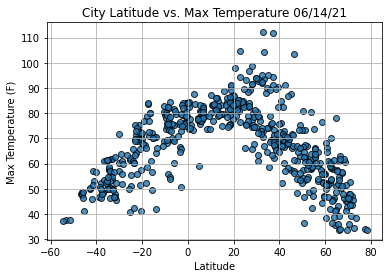

In [25]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

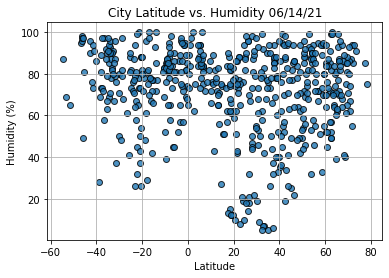

In [26]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

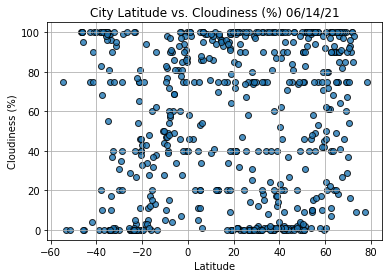

In [27]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

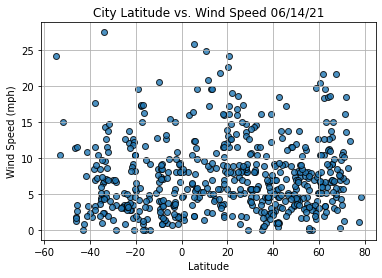

In [34]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [38]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [42]:
index13 = city_data_df.loc[13]
index13


City                      Ushuaia
Country                        AR
Date          2021-06-14 21:40:25
Lat                         -54.8
Lng                         -68.3
Max Temp                    37.06
Humidity                       87
Cloudiness                     75
Wind Speed                  24.16
Name: 13, dtype: object

In [43]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Sao Filipe,CV,2021-06-14 21:40:55,14.8961,-24.4956,74.89,74,96,10.71
4,Klaksvik,FO,2021-06-14 21:40:56,62.2266,-6.5890,41.92,72,100,18.25
7,Ponta Do Sol,PT,2021-06-14 21:40:57,32.6667,-17.1000,70.43,79,18,2.75
11,Butaritari,KI,2021-06-14 21:40:58,3.0707,172.7902,83.64,75,20,16.02
14,Grindavik,IS,2021-06-14 21:40:59,63.8424,-22.4338,46.35,65,20,18.41


In [44]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

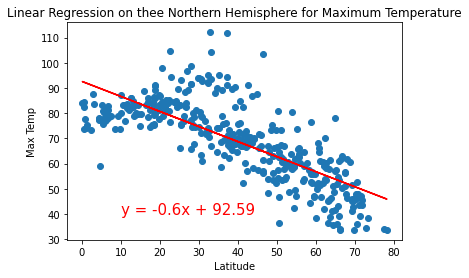

In [75]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plt.title(f"Linear Regression on thee Northern Hemisphere for Maximum Temperature")
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))



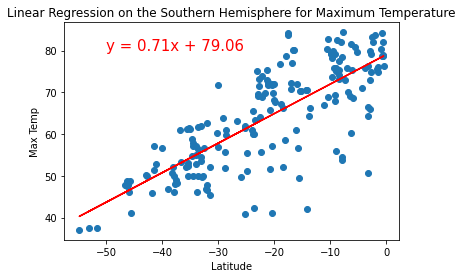

In [77]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plt.title(f"Linear Regression on the Southern Hemisphere for Maximum Temperature")
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,80))

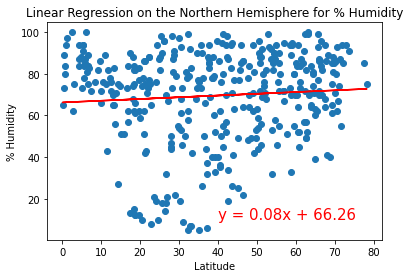

In [91]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plt.title(f"Linear Regression on the Northern Hemisphere for % Humidity")
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

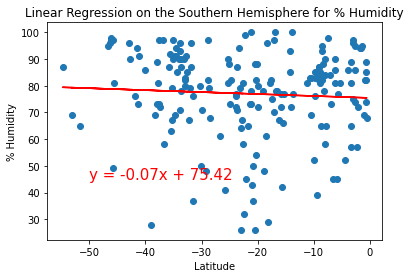

In [90]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plt.title(f"Linear Regression on the Southern Hemisphere for % Humidity")
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,45))

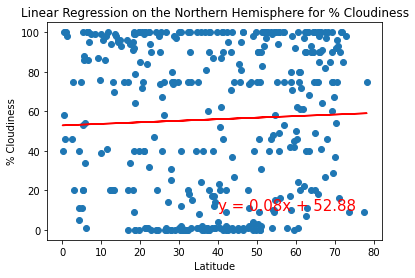

In [89]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plt.title(f"Linear Regression on the Northern Hemisphere for % Cloudiness")
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

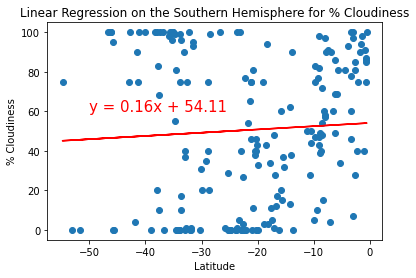

In [88]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plt.title(f"Linear Regression on the Southern Hemisphere for % Cloudiness")
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

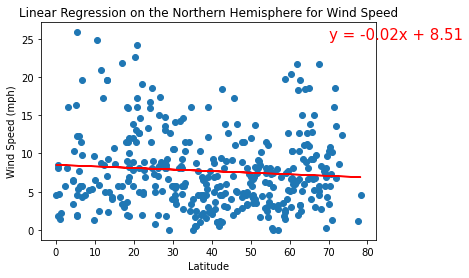

In [87]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plt.title(f"Linear Regression on the Northern Hemisphere for Wind Speed")
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed (mph)',(70,25))

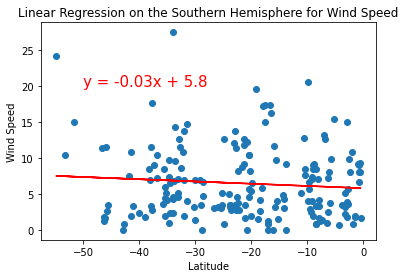

In [86]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plt.title(f"Linear Regression on the Southern Hemisphere for Wind Speed")
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,20))
